In [7]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import glob

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [8]:
training_path = Path('training')

training_tasks = [f for f in os.listdir(training_path) if f.endswith('.json')]

In [9]:
def plot_one(ax, i,train_or_test,input_or_output):
    cmap = colors.ListedColormap(
        ['#2B2B2B', '#248ADA','#C71010','#1FC719','#F7DE28',
         '#878494', '#F954F2', '#EE6000', '#6B23A9', '#8B5A28'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)    
    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if input_or_output == 'input':
        ax.set_title('Example #'+ str(i+1), fontsize = 16)
    else:
        ax.set_title('$\u2193$', fontsize = 30, fontweight = 'bold')
    #remove tickmarks
    ax.tick_params(
        axis='both', which='both', length=0,
        bottom=False, top=False, left=False, right=False)
    

def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """    
    num_train = len(task['train'])
    fig, axs = plt.subplots(2, num_train, figsize=(6*num_train,3*2))
    for i in range(num_train):     
        plot_one(axs[0,i],i,'train','input')
        plot_one(axs[1,i],i, 'train','output')        
    plt.tight_layout()

0
00.json


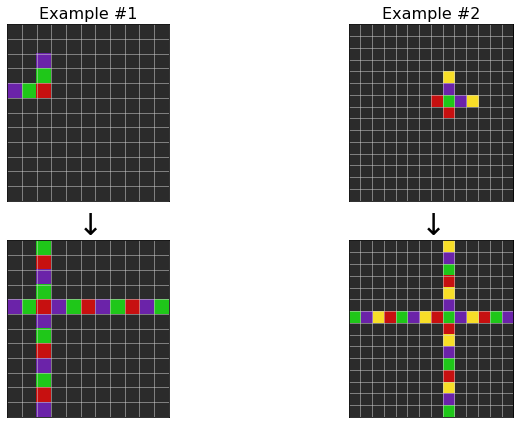

1
01.json


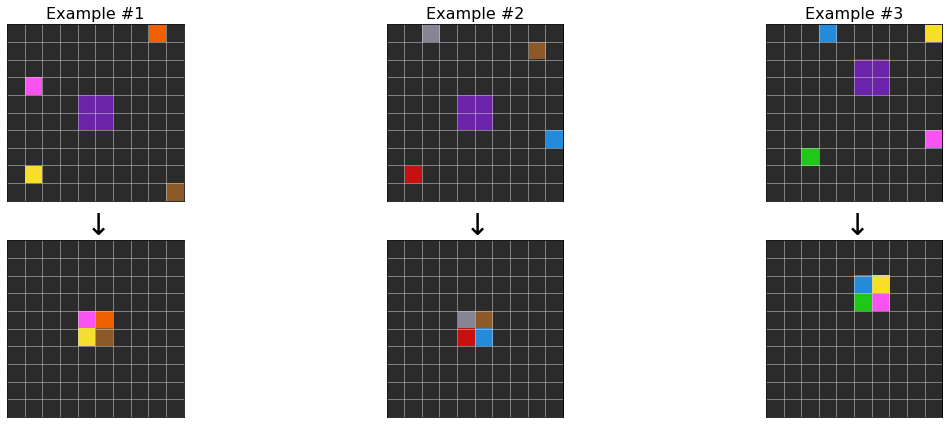

In [10]:
for i in range(len(training_tasks)):
    task_file = str(training_tasks[i])
    
    with open(training_path/task_file, 'r') as f:
        task = json.load(f)
        
    print(i)
    print(training_tasks[i])
    plot_task(task)
    plt.savefig('examples/'+task_file+'.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()